In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import data
from skimage import exposure
from skimage.transform import match_histograms
import os
import random

In [2]:
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [13]:
def s_p(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [3]:
root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/histogram/"
image_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/image/"
mask_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/mask/"
box_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/box/"
realbox_root = "/media/arg_ws3/5E703E3A703E18EB/data/MM_BOX/train/B/"
realbox_list = os.listdir(realbox_root)
box_list = os.listdir(box_root)

In [7]:
len(box_list)
counter = 0

In [8]:
for box in box_list:
    counter = counter + 1
    if counter % 1000 == 0:
        print(counter)
    #box = box_list[random.randint(0,len(box_list)-1)]
    mask_name = box.split('_original.png')[0] + '_seg.png'
    fake_img = cv2.imread(os.path.join(box_root, box))
    real_img = cv2.imread(os.path.join(realbox_root, realbox_list[random.randint(0,len(realbox_list)-1)]))
    matched = match_histograms(fake_img, real_img, multichannel=True)
    matched = hist_match(fake_img, real_img).astype(np.uint8)
    image = cv2.imread(os.path.join(image_root, box))
    mask_img = cv2.imread(os.path.join(mask_root, mask_name), 0)
    mask_img[mask_img != 0 ] = 255
    mask_img = mask_img - 255
    mask_img[mask_img != 0 ] = 255
    mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)
    matched = cv2.bitwise_and(matched, mask, mask=mask_img)
    mask_img[mask_img < 255] = 1
    mask_img[mask_img == 255] = 0
    mask_img[mask_img == 1] = 255
    mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)
    image = cv2.bitwise_and(image, mask, mask=mask_img)
    result = cv2.add(matched, image)
    #cv2.imwrite(os.path.join(root, box), result)
    cv2.imwrite(os.path.join(root, box), result)
    #plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000


In [18]:
s_p_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/blur_s_p/"
image_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/image/"
image_list = os.listdir(image_root)

In [19]:
counter = 0
len(box_list)

68608

In [25]:
for image_name in image_list:
    counter = counter + 1
    if counter % 1000 == 0:
        print(counter)
    img = cv2.imread(os.path.join(image_root, image_name))
    rand_blur = int(random.randint(0, 7)*2) + 1
    img = cv2.GaussianBlur(img, (rand_blur, rand_blur), 0)
    s_p_noise = random.randint(0, 40)/10000
    img = s_p(img, s_p_noise)
    #cv2.imwrite(os.path.join(root, box), result)
    #cv2.imwrite(os.path.join(root, box), result)
    cv2.imwrite(os.path.join(s_p_root, image_name), img)
    #plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    #break

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000


In [32]:
h_s_p_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/his_blur_s_p/"
image_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/image/"
mask_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/mask/"
box_root = "/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/box/"
realbox_root = "/media/arg_ws3/5E703E3A703E18EB/data/MM_BOX/train/B/"
realbox_list = os.listdir(realbox_root)
box_list = os.listdir(box_root)

In [33]:
len(box_list)
counter = 0

In [34]:
for box in box_list:
    counter = counter + 1
    if counter % 1000 == 0:
        print(counter)
    #box = box_list[random.randint(0,len(box_list)-1)]
    mask_name = box.split('_original.png')[0] + '_seg.png'
    fake_img = cv2.imread(os.path.join(box_root, box))
    real_img = cv2.imread(os.path.join(realbox_root, realbox_list[random.randint(0,len(realbox_list)-1)]))
    matched = match_histograms(fake_img, real_img, multichannel=True)
    matched = hist_match(fake_img, real_img).astype(np.uint8)
    image = cv2.imread(os.path.join(image_root, box))
    mask_img = cv2.imread(os.path.join(mask_root, mask_name), 0)
    mask_img[mask_img != 0 ] = 255
    mask_img = mask_img - 255
    mask_img[mask_img != 0 ] = 255
    mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)
    matched = cv2.bitwise_and(matched, mask, mask=mask_img)
    mask_img[mask_img < 255] = 1
    mask_img[mask_img == 255] = 0
    mask_img[mask_img == 1] = 255
    mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)
    image = cv2.bitwise_and(image, mask, mask=mask_img)
    result = cv2.add(matched, image)
    # ========================================
    rand_blur = int(random.randint(0, 7)*2) + 1
    result = cv2.GaussianBlur(result, (rand_blur, rand_blur), 0)
    s_p_noise = random.randint(0, 40)/10000
    result = s_p(result, s_p_noise)
    #cv2.imwrite(os.path.join(root, box), result)
    #cv2.imwrite(os.path.join(root, box), result)
    cv2.imwrite(os.path.join(h_s_p_root, box), result)
    #plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

    #plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000


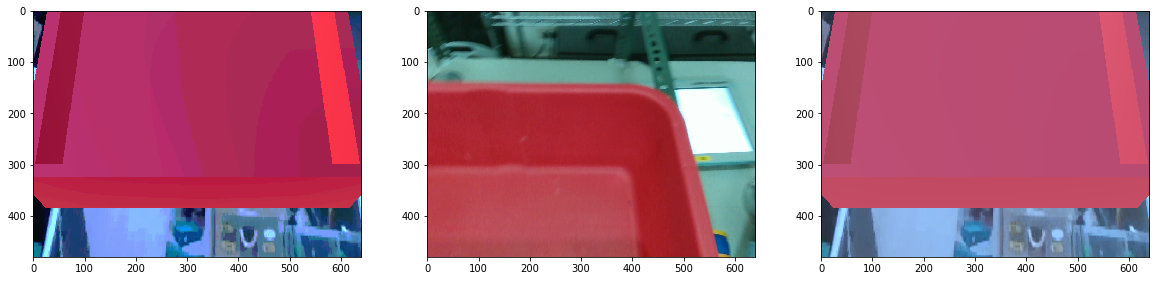

In [112]:
matched = hist_match(fake_img, real_img).astype(np.uint8)
fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1,3,1)
plt.imshow(cv2.cvtColor(matched, cv2.COLOR_BGR2RGB))
fig.add_subplot(1,3,2)
plt.imshow(cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB))
fig.add_subplot(1,3,3)
plt.imshow(cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB))
plt.show()

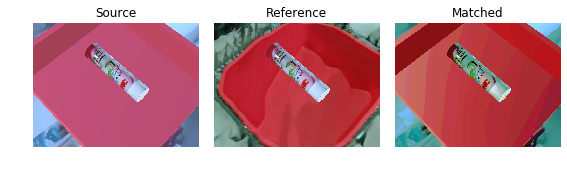

In [31]:
reference = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB)

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()